# Importing Libraries and Reading the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('drive/My Drive/EarthQuakes/database.csv')

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Explanatory Data Analysis

In [5]:
df.shape

(23412, 21)

In [6]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [8]:
# percentages of null values per column
df.isna().mean().sort_values(ascending=False) * 100

Magnitude Error               98.603280
Horizontal Error              95.062361
Horizontal Distance           93.148813
Magnitude Seismic Stations    89.048351
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Azimuthal Gap                 68.823680
Root Mean Square              25.884162
Magnitude Type                 0.012814
Magnitude Source               0.000000
Location Source                0.000000
Source                         0.000000
ID                             0.000000
Date                           0.000000
Time                           0.000000
Magnitude                      0.000000
Depth                          0.000000
Type                           0.000000
Longitude                      0.000000
Latitude                       0.000000
Status                         0.000000
dtype: float64

**Dropping the columns that have significant amount of null values**

In [9]:
df = df.drop(['Magnitude Error', 'Horizontal Error', 'Horizontal Distance', 'Magnitude Seismic Stations',
             'Depth Error', 'Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square'], axis=1)

In [10]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [11]:
# Splitting the columns according to their data types
date_cols = ['Date', 'Time']
cat_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
num_cols = ['Depth', 'Magnitude']

## Univariate Analysis

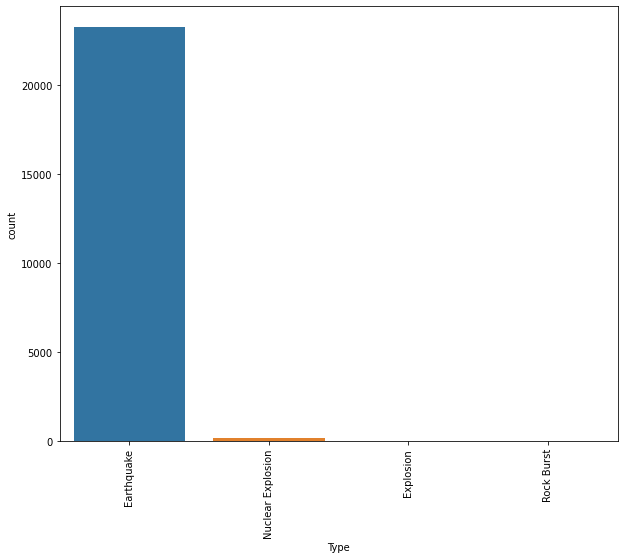

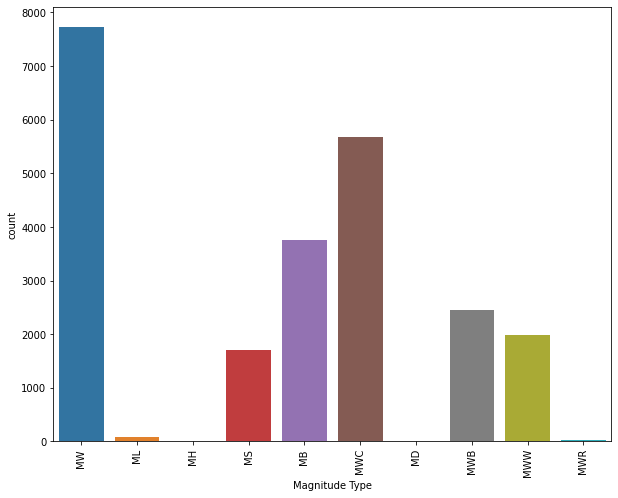

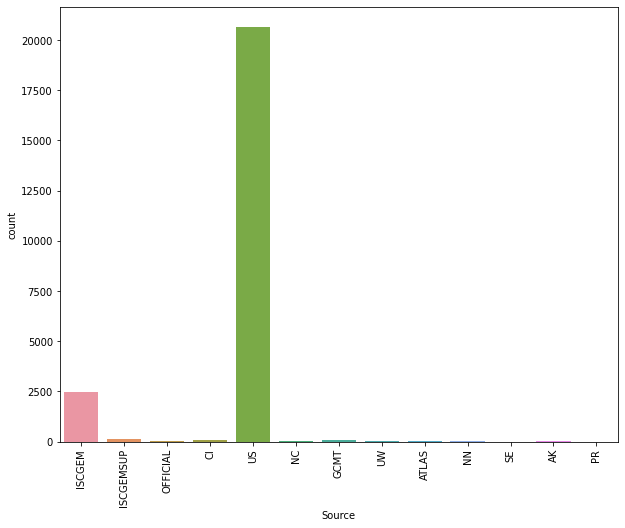

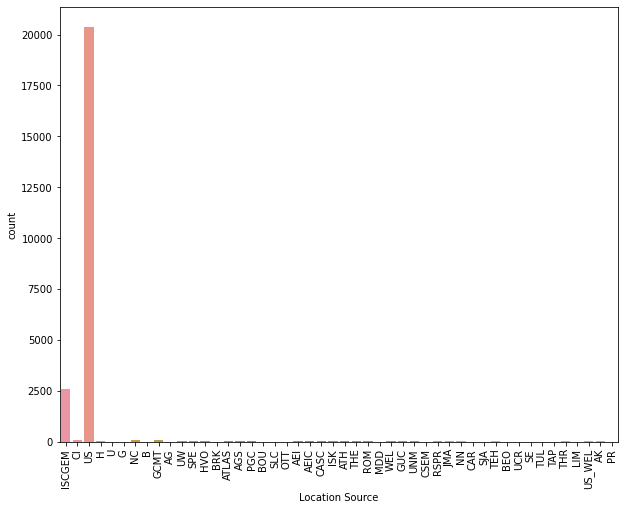

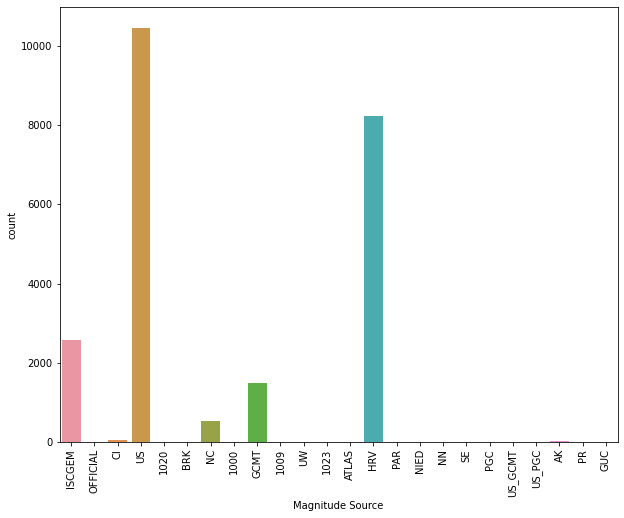

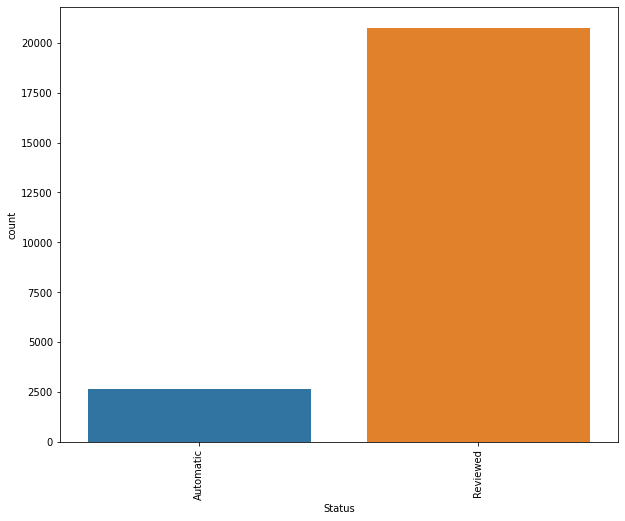

In [12]:
for cat in cat_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=cat, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
df[cat_cols].nunique()

Type                 4
Magnitude Type      10
Source              13
Location Source     48
Magnitude Source    24
Status               2
dtype: int64

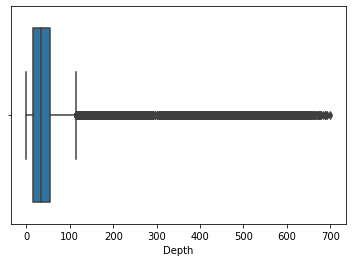

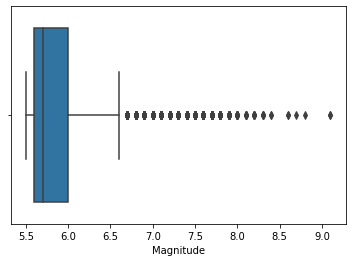

In [14]:
for num in num_cols:
    sns.boxplot(x=num, data=df)
    plt.show()

**Checking the correlation between the depth and the Magnitude**

In [15]:
df[['Depth', 'Magnitude']].corr()

,Depth,Magnitude
Depth,1.000000,0.023457
Magnitude,0.023457,1.000000


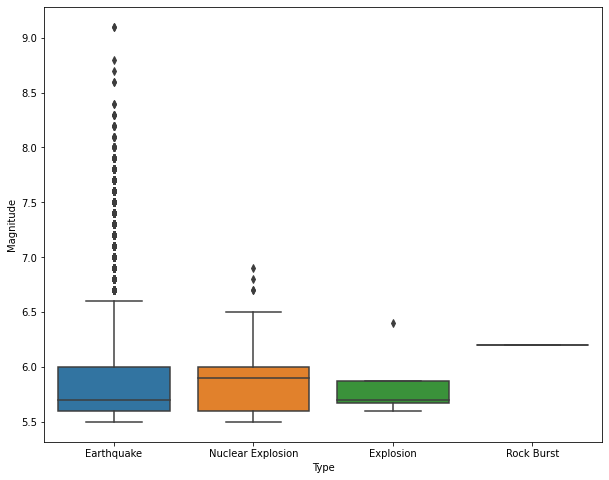

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='Magnitude', data=df);

## Multivariate Analysis

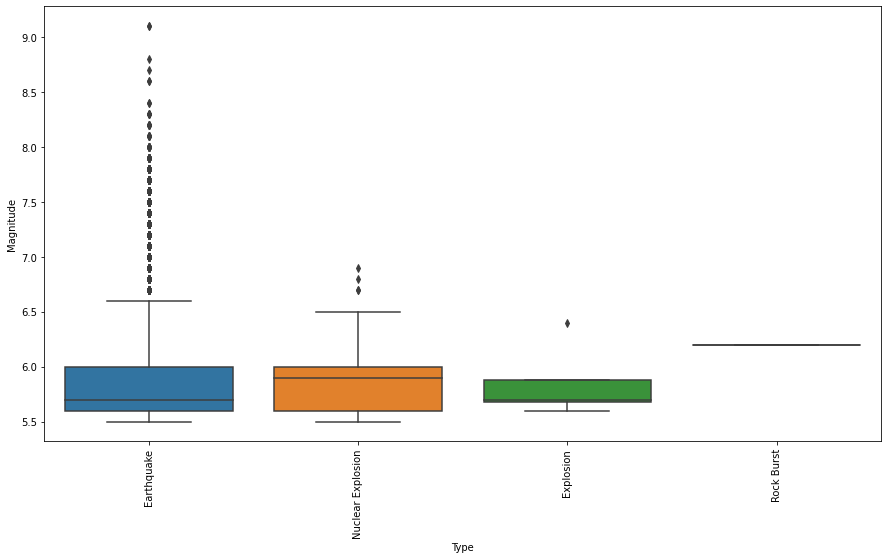

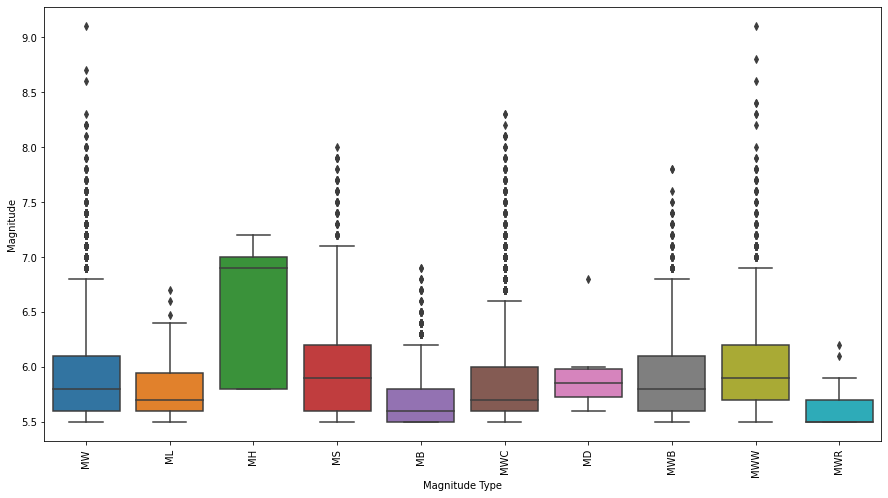

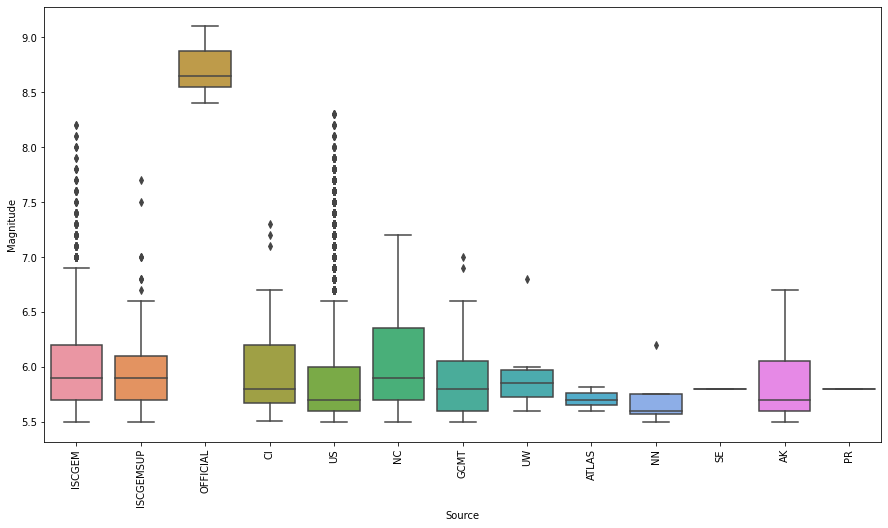

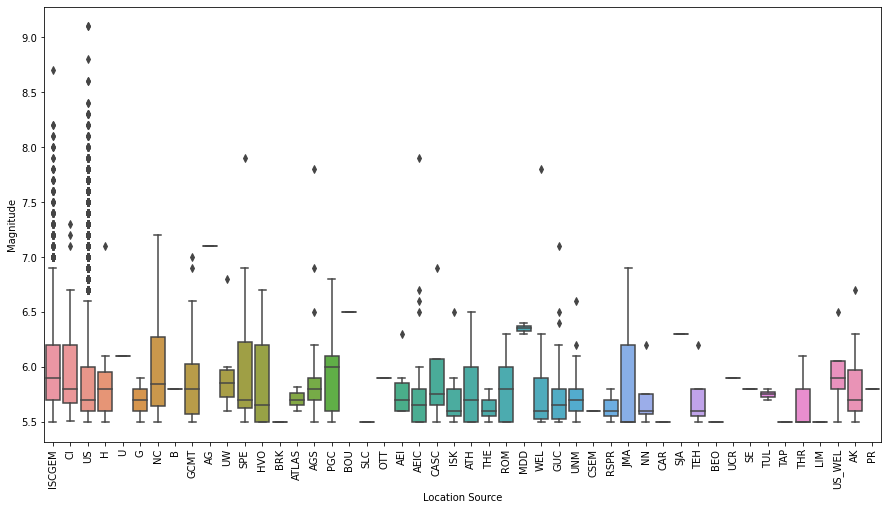

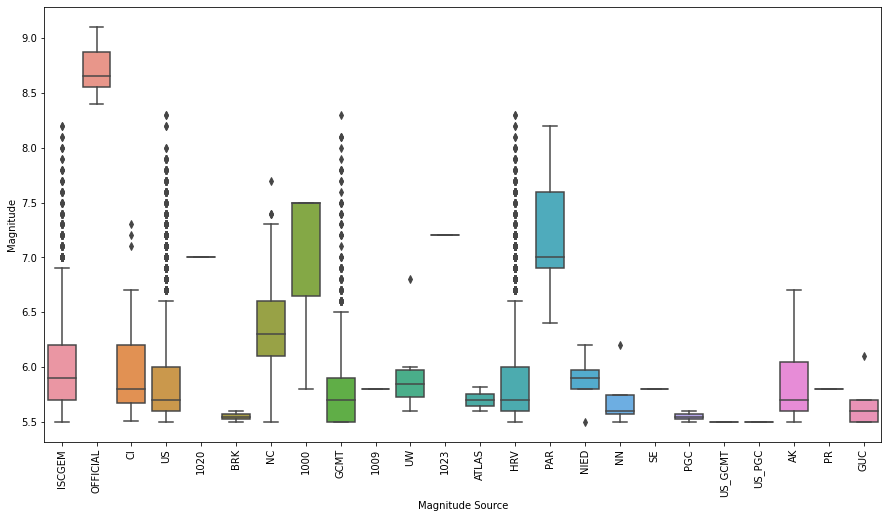

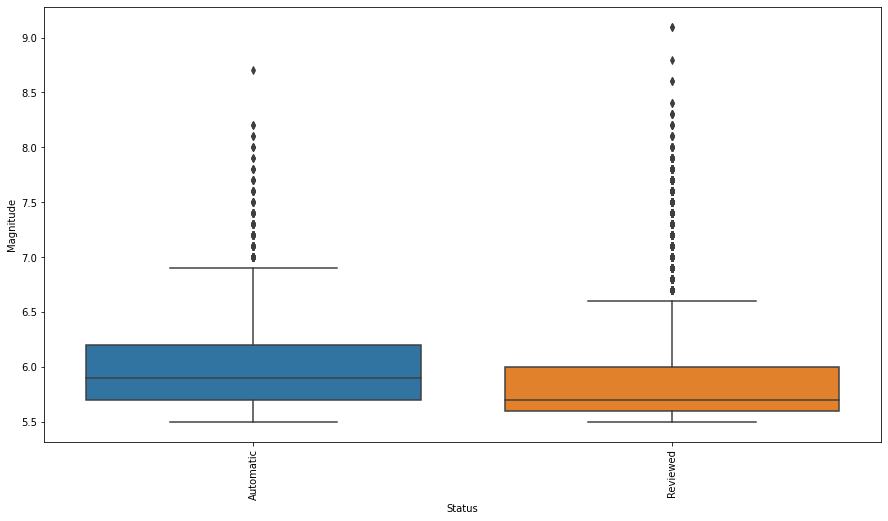

In [17]:
# Checking the magnitude with the categorical features
for cat in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=cat, y='Magnitude', data=df)
    plt.xticks(rotation=90)
    plt.show()

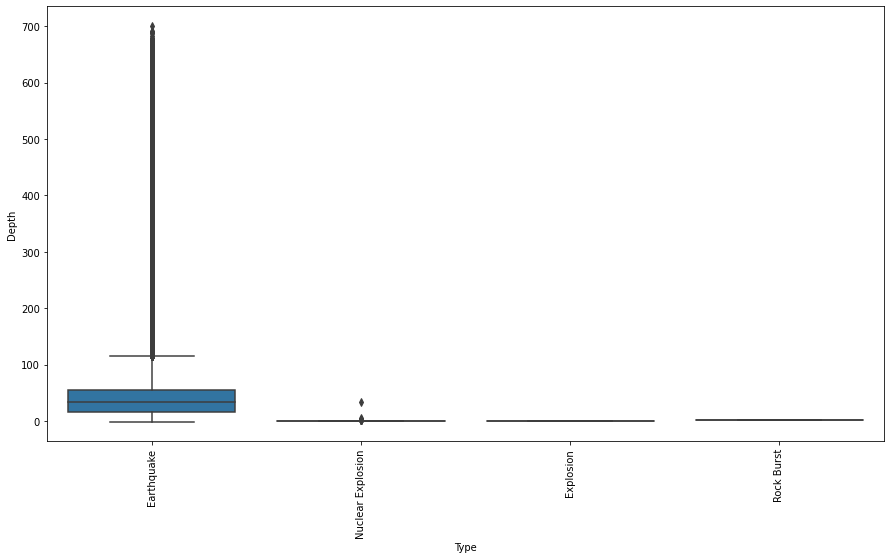

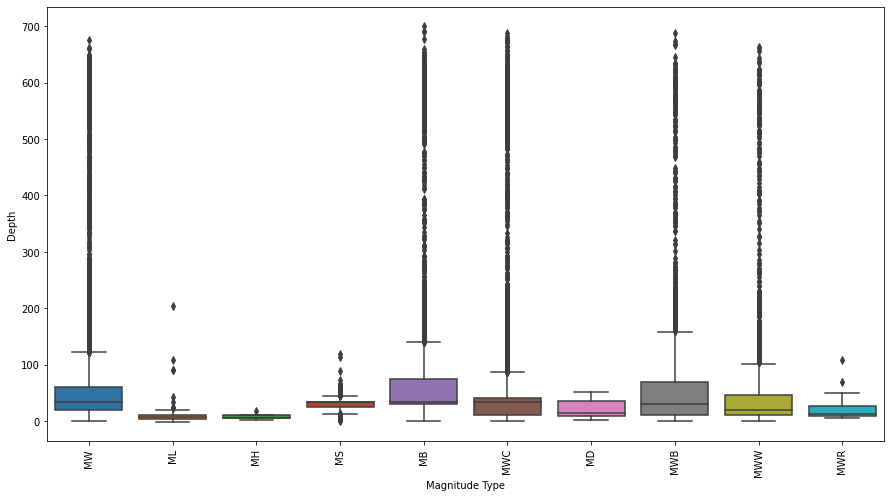

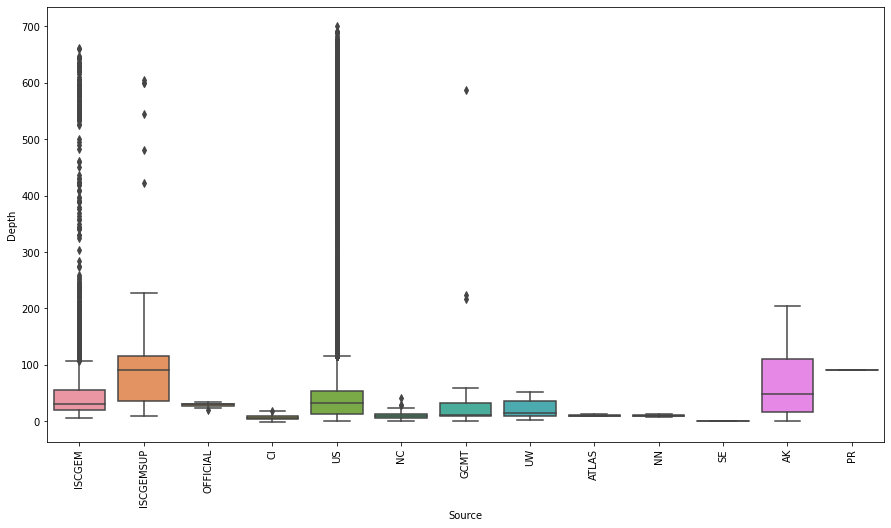

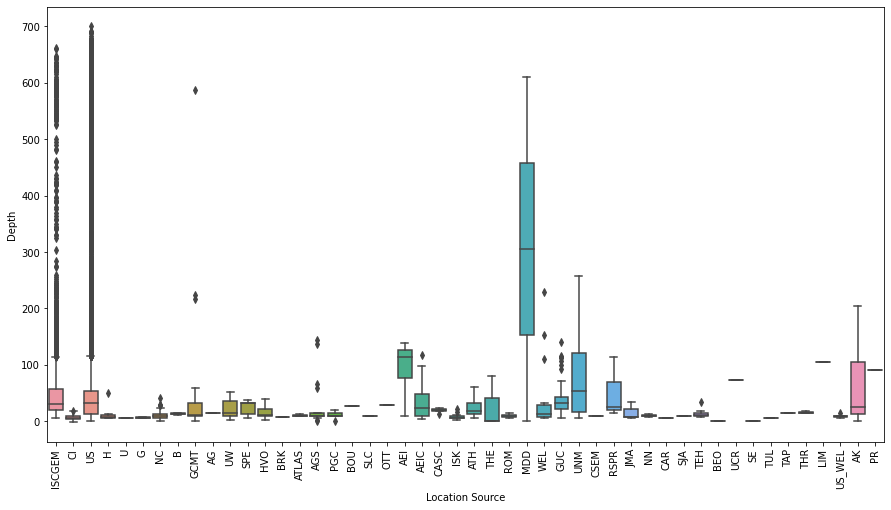

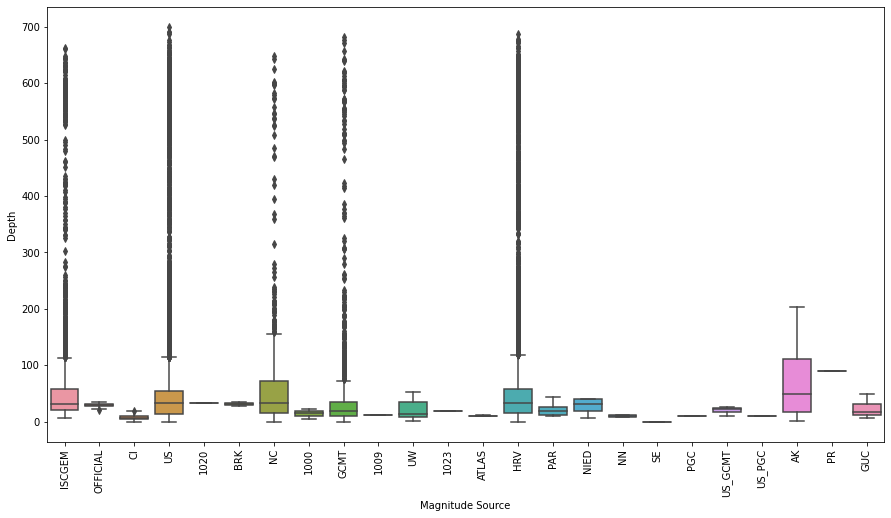

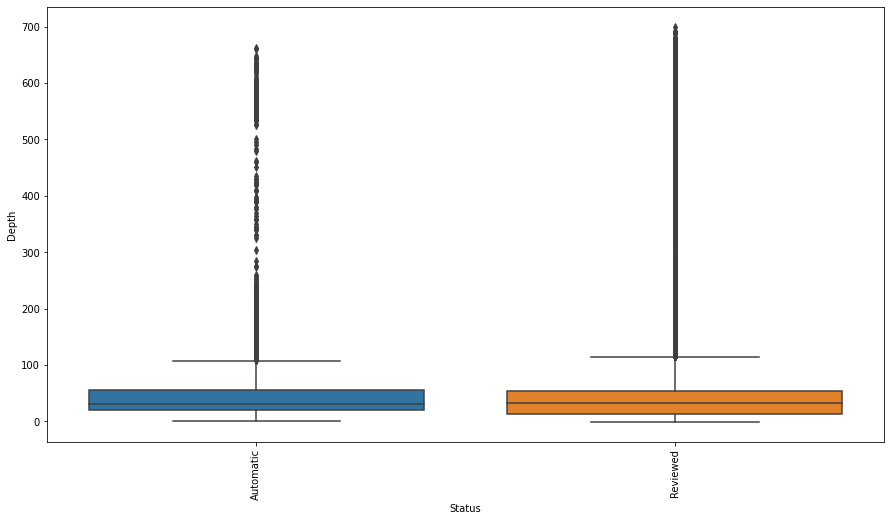

In [18]:
for cat in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=cat, y='Depth', data=df)
    plt.xticks(rotation=90)
    plt.show()

**Extracting Date features**

In [19]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [20]:
df.loc[3378, ['Date','Time']] = ['02/23/1975', '02:58:41']
df.loc[7512, ['Date','Time']] = ['04/28/1985', '02:53:41']
df.loc[20650, ['Date','Time']] = ['03/13/2011', '02:23:34']
     

In [21]:
# Combine the 'Date' and 'Time' columns
df['Datetime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

# Convert the new column to a datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M:%S')

columns = df.columns.tolist() # This code positions 'Datetime' in the first index
columns.remove('Datetime')
columns.insert(0, 'Datetime')
df = df.reindex(columns, axis=1)

df['Datetime'].head()

0   1965-01-02 13:44:18
1   1965-01-04 11:29:49
2   1965-01-05 18:05:58
3   1965-01-08 18:49:43
4   1965-01-09 13:32:50
Name: Datetime, dtype: datetime64[ns]

In [22]:
def extract_data_features(df):
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.strftime('%B')
    df['WeekDay'] = df['Datetime'].dt.day_name()
    df['Hour'] = df['Datetime'].dt.hour
    
    # month_dict = {
    #     1: 'Jan',
    #     2: 'Feb',
    #     3: 'Mar',
    #     4: 'Apr',
    #     5: 'May',
    #     6: 'Jun',
    #     7: 'Jul',
    #     8: 'Aug',
    #     9: 'Sep',
    #     10: 'Oct',
    #     11: 'Nov',
    #     12: 'Dec'
    # }
    
    # day_of_week = {
    #     1: 'Mon',
    #     2: 'Tue',
    #     3: 'Wed',
    #     4: 'Thur',
    #     5: 'Fri',
    #     6: 'Sat',
    #     0: 'Sun'
    # }
    
    # df['Month'] = df['Month'].map(month_dict)
    # df['WeekDay'] = df['WeekDay'].map(day_of_week)
    
    return df

In [23]:
# pd.to_datetime(df['Date'])

In [24]:
df = extract_data_features(df)

In [25]:
df.head()

,Datetime,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,1965-01-02 13:44:18,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Saturday,13
1,1965-01-04 11:29:49,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Monday,11
2,1965-01-05 18:05:58,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Tuesday,18
3,1965-01-08 18:49:43,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Friday,18
4,1965-01-09 13:32:50,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Saturday,13


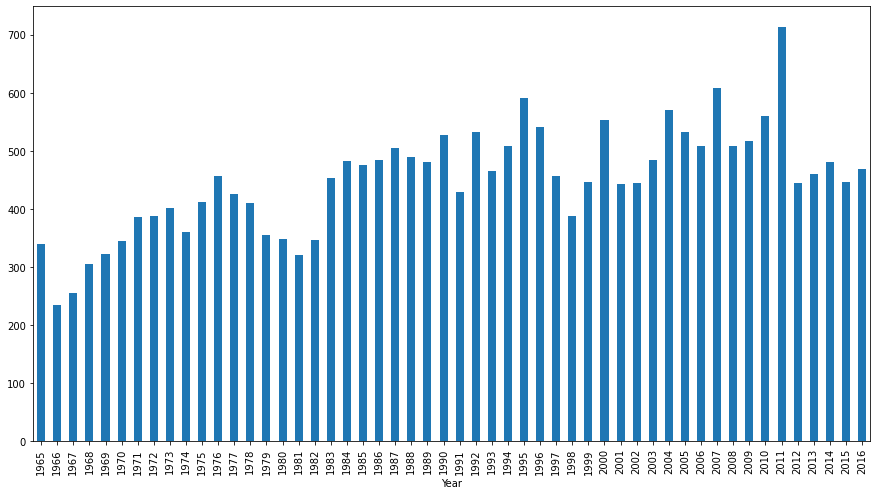

In [26]:
df.groupby('Year').count()['ID'].plot.bar(figsize=(15,8));

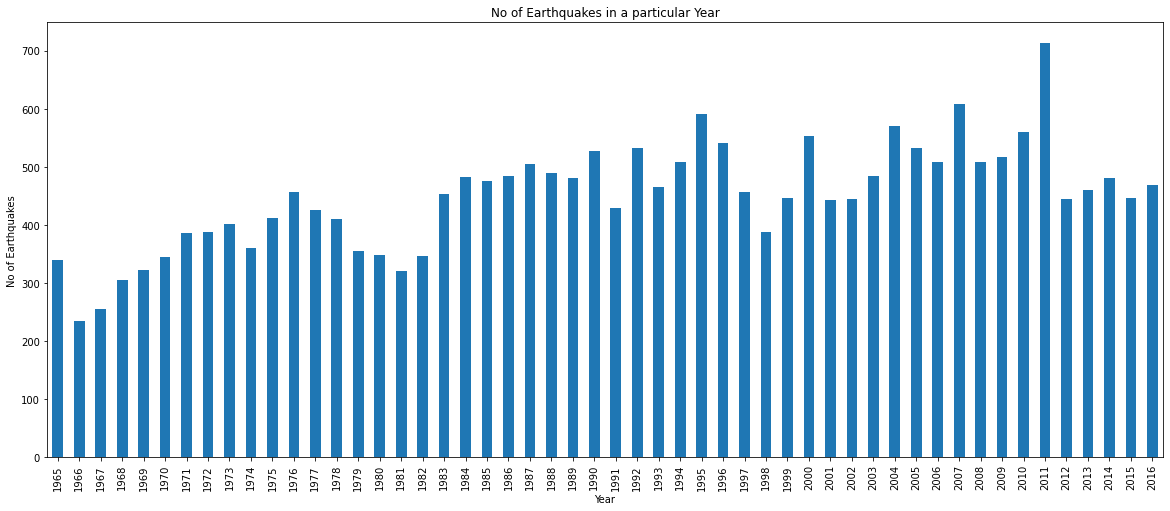

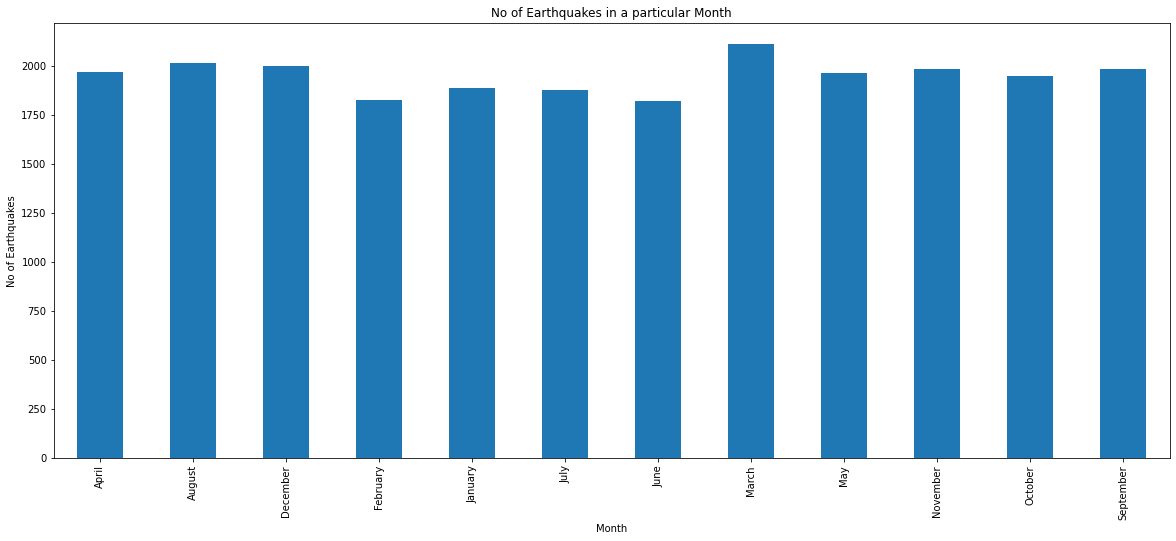

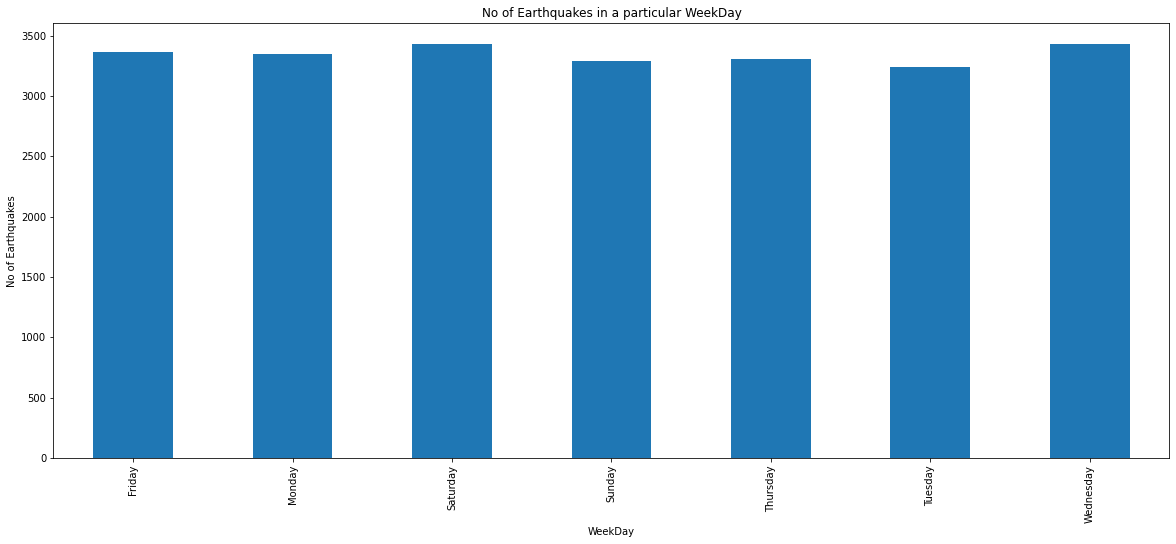

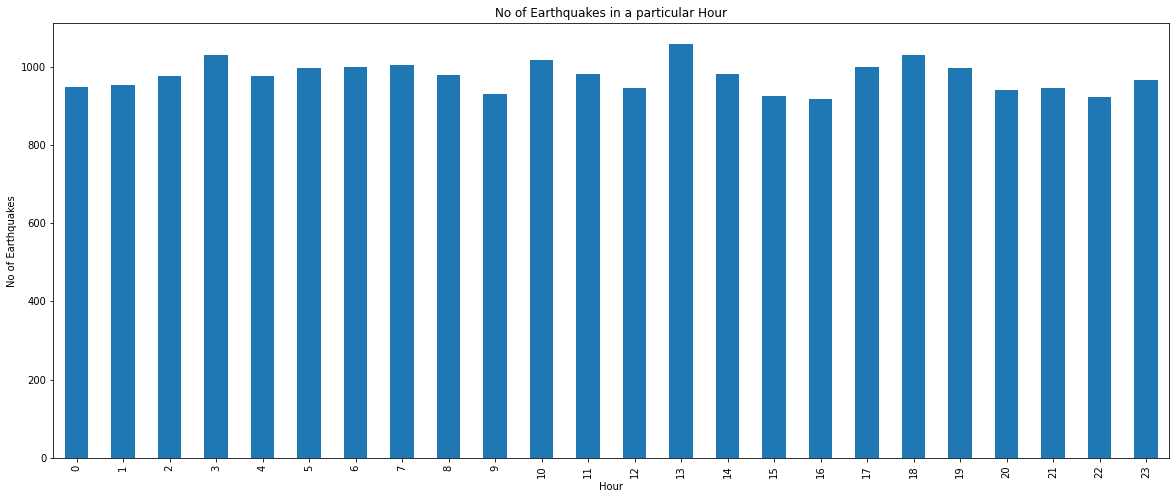

In [27]:
for col in ['Year', 'Month', 'WeekDay', 'Hour']:
  df.groupby(col)['ID'].count().plot.bar(figsize=(20, 8))
  plt.title(f'No of Earthquakes in a particular {col}')
  plt.ylabel('No of Earthquakes')
  plt.show()


**Selecting a subset of the dataset where type is Earthquake**

In [28]:
df = df[df['Type']=='Earthquake']
df = df.drop('Type', axis=1)

In [29]:
df.head()

,Datetime,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,1965-01-02 13:44:18,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Saturday,13
1,1965-01-04 11:29:49,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Monday,11
2,1965-01-05 18:05:58,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Tuesday,18
3,1965-01-08 18:49:43,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Friday,18
4,1965-01-09 13:32:50,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,January,Saturday,13


**Selecting the relevant columns for modelling**

In [30]:
df.columns

Index(['Datetime', 'Date', 'Time', 'Latitude', 'Longitude', 'Depth',
       'Magnitude', 'Magnitude Type', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status', 'Year', 'Month', 'WeekDay', 'Hour'],
      dtype='object')

In [31]:
df = df[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
        'Status', 'Year', 'Month', 'WeekDay', 'Hour']]

In [32]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,19.246,145.616,131.6,6.0,MW,ISCGEM,Automatic,1965,January,Saturday,13
1,1.863,127.352,80.0,5.8,MW,ISCGEM,Automatic,1965,January,Monday,11
2,-20.579,-173.972,20.0,6.2,MW,ISCGEM,Automatic,1965,January,Tuesday,18
3,-59.076,-23.557,15.0,5.8,MW,ISCGEM,Automatic,1965,January,Friday,18
4,11.938,126.427,15.0,5.8,MW,ISCGEM,Automatic,1965,January,Saturday,13


**The target variable will be Magnitude**

In [33]:
# Setting the independent and dependent variables
X = df.drop('Magnitude', axis=1)
y = df['Magnitude']

In [34]:
# one hot encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

**Splitting the data to train and test**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
# scaling the values
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Baseline Models

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

In [42]:
def rmse(y_true, y_test):
  return np.sqrt(np.mean((y_true - y_test) ** 2))

In [43]:
def model_evaluation(model, xtrain, ytrain, xtest, ytest):
  """
  This function fits a model then returns the rmse and R2 score of the model
  """
  model = model.fit(xtrain, ytrain) # trains on the training set

  predictions = model.predict(xtest) # gets the predictions

  return rmse(ytest, predictions), mean_absolute_error(ytest, predictions)

**We will Check the following  models:**
- LinearRegression
- RandomForestRegressor
- XGBOOSTREGRESSOR
- GRADIENTBOOSTINGREGRESSOR
- DecisionTreeRegressor

In [45]:
# Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [46]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
xg_model = XGBRegressor()
grad_boost_model = GradientBoostingRegressor()
dtree_model = DecisionTreeRegressor()

rmse_scores = []
mae_scores = []

print("BASELINE RESULTS:")
for model in [linear_model, rf_model, xg_model, grad_boost_model, dtree_model]:

  root_mean_score, mae = model_evaluation(model, X_scaled_train, y_train, X_scaled_test, y_test)
  rmse_scores.append(root_mean_score)
  mae_scores.append(mae)

  print(f"{model}: RMSE {root_mean_score}, MAE {mae}")
  print()

models_df = pd.DataFrame(data={'Models': [linear_model, rf_model, xg_model, grad_boost_model, dtree_model],
                               'RMSE': rmse_scores,
                               'MAE': mae_scores}, index=['Models'], )
models_df

BASELINE RESULTS:
LinearRegression(): RMSE 11651936194.07389, MAE 197377074.30292314

RandomForestRegressor(): RMSE 0.3947386411143167, MAE 0.2898064084170256

[07:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(): RMSE 0.3848752235996032, MAE 0.2811489217832065

GradientBoostingRegressor(): RMSE 0.3855989186450911, MAE 0.28222814045319844

DecisionTreeRegressor(): RMSE 0.5523154729279102, MAE 0.38137015781922534



ValueError: ignored

**LinearRegression(): RMSE 21422970.997668203, R2_Score -2599912373741259.5**

**RandomForestRegressor(): RMSE 0.3925312635563206, R2_Score 0.12713352022014734**

**DecisionTreeRegressor(): RMSE 0.5480104618381612, R2_Score -0.7012847545604639**

**GradientBoostingRegressor is the best of the model tested with an rmse score of 0.3852**

**Using lazypredict**

In [ ]:
# !pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyRegressor

In [ ]:
# reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)

In [ ]:
# models, predictions = reg.fit(X_scaled_train, X_scaled_test, y_train, y_test)

## Trying out Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
print(tf. __version__)

2.11.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [48]:
X_scaled_train.shape

(16262, 55)

In [49]:
model = Sequential()

model.add(Dense(77,activation='relu'))
model.add(Dense(77,activation='relu'))
model.add(Dense(77,activation='relu'))
model.add(Dense(77,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [50]:
model.fit(x=X_scaled_train,y=y_train.values,
          validation_data=(X_scaled_test,y_test.values), epochs=50)

Epoch 1/50
509/509 [==============================] - 3s 3ms/step - loss: 0.6266 - val_loss: 0.3515
Epoch 2/50
509/509 [==============================] - 1s 3ms/step - loss: 0.3377 - val_loss: 0.3212
Epoch 3/50
509/509 [==============================] - 1s 3ms/step - loss: 0.3149 - val_loss: 0.3118
Epoch 4/50
509/509 [==============================] - 1s 3ms/step - loss: 0.3034 - val_loss: 0.3252
Epoch 5/50
509/509 [==============================] - 1s 3ms/step - loss: 0.2974 - val_loss: 0.3056
Epoch 6/50
509/509 [==============================] - 2s 4ms/step - loss: 0.2932 - val_loss: 0.3235
Epoch 7/50
509/509 [==============================] - 2s 4ms/step - loss: 0.2937 - val_loss: 0.2911
Epoch 8/50
509/509 [==============================] - 1s 3ms/step - loss: 0.2871 - val_loss: 0.3446
Epoch 9/50
509/509 [==============================] - 1s 2ms/step - loss: 0.2880 - val_loss: 0.2852
Epoch 10/50
509/509 [==============================] - 1s 3ms/step - loss: 0.2835 - val_loss: 0.2874

In [51]:
losses = pd.DataFrame(model.history.history)

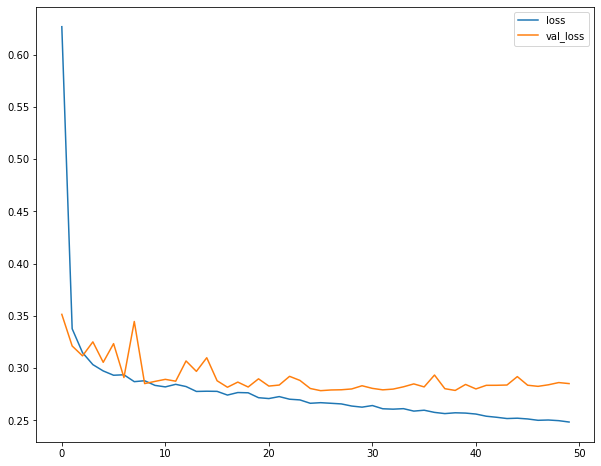

In [52]:
losses.plot(figsize=(10,8));

In [53]:
predictions = model.predict(X_scaled_test)

218/218 [==============================] - 0s 1ms/step


In [55]:
rmse(y_test.values, predictions)

0.4847267064713114

In [54]:
mean_absolute_error(y_test.values, predictions)

0.2852547505240529

Neural Networks performed poorly compared to the regression trees.

TODO:
- Use early stopping and dropout to optimize the nueral networks
- Optimize further GradientBoostingRegressor

**CatBoostRegressor**

In [60]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.4 MB/s eta 0:00:00


In [61]:
from catboost import CatBoostRegressor

In [62]:
cb_model = CatBoostRegressor().fit(X_scaled_train, y_train)

Learning rate set to 0.063613
0:	learn: 0.4238586	total: 50.2ms	remaining: 50.1s
1:	learn: 0.4217705	total: 53.3ms	remaining: 26.6s
2:	learn: 0.4198820	total: 56.6ms	remaining: 18.8s
3:	learn: 0.4182964	total: 60.1ms	remaining: 15s
4:	learn: 0.4169240	total: 63.3ms	remaining: 12.6s
5:	learn: 0.4156582	total: 66.8ms	remaining: 11.1s
6:	learn: 0.4144099	total: 70.2ms	remaining: 9.95s
7:	learn: 0.4136488	total: 73.4ms	remaining: 9.1s
8:	learn: 0.4128181	total: 76.7ms	remaining: 8.45s
9:	learn: 0.4120767	total: 80ms	remaining: 7.92s
10:	learn: 0.4115425	total: 83.2ms	remaining: 7.48s
11:	learn: 0.4109906	total: 86.5ms	remaining: 7.12s
12:	learn: 0.4103394	total: 89.8ms	remaining: 6.81s
13:	learn: 0.4095306	total: 93ms	remaining: 6.55s
14:	learn: 0.4088148	total: 96.4ms	remaining: 6.33s
15:	learn: 0.4081959	total: 99.7ms	remaining: 6.13s
16:	learn: 0.4076649	total: 107ms	remaining: 6.17s
17:	learn: 0.4071457	total: 112ms	remaining: 6.13s
18:	learn: 0.4067852	total: 116ms	remaining: 5.97s
19

In [63]:
cb_pred = cb_model.predict(X_scaled_test)

In [64]:
rmse(y_test, cb_pred)

0.3846704463223681

In [65]:
mean_absolute_error(y_test, cb_pred)

0.2787889955899024

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {'n_estimators': [10, 50, 100, 150, 200, 250, 300],
              'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                 }

In [68]:
grid = GridSearchCV(estimator=CatBoostRegressor(), param_grid = parameters, cv = 2, n_jobs=-1)

In [69]:
grid.fit(X_scaled_train, y_train)

0:	learn: 0.4228721	total: 4.32ms	remaining: 859ms
1:	learn: 0.4197552	total: 8.41ms	remaining: 832ms
2:	learn: 0.4171276	total: 11.9ms	remaining: 782ms
3:	learn: 0.4150739	total: 15.3ms	remaining: 751ms
4:	learn: 0.4135478	total: 18.7ms	remaining: 730ms
5:	learn: 0.4120579	total: 22.2ms	remaining: 717ms
6:	learn: 0.4107511	total: 25.6ms	remaining: 706ms
7:	learn: 0.4099805	total: 28.8ms	remaining: 690ms
8:	learn: 0.4093921	total: 31.9ms	remaining: 677ms
9:	learn: 0.4079909	total: 35.4ms	remaining: 672ms
10:	learn: 0.4070664	total: 38.6ms	remaining: 664ms
11:	learn: 0.4065028	total: 41.9ms	remaining: 656ms
12:	learn: 0.4058571	total: 45.1ms	remaining: 649ms
13:	learn: 0.4043570	total: 48.8ms	remaining: 649ms
14:	learn: 0.4032772	total: 52.3ms	remaining: 646ms
15:	learn: 0.4025392	total: 55.8ms	remaining: 642ms
16:	learn: 0.4019107	total: 59.1ms	remaining: 636ms
17:	learn: 0.4012043	total: 62.5ms	remaining: 632ms
18:	learn: 0.4008034	total: 65.8ms	remaining: 627ms
19:	learn: 0.4002824	t

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa933dce730>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300]})

In [70]:
grid.best_params_

{'depth': 6, 'learning_rate': 0.1, 'n_estimators': 200}

In [71]:
cb_tuned = grid.predict(X_scaled_test)

In [72]:
rmse(y_test, cb_tuned), mean_absolute_error(y_test, cb_tuned)

(0.383155293684665, 0.27856884746033694)

In [75]:
cb_model.feature_importances_

array([9.69840898e+00, 1.01139396e+01, 1.60964416e+01, 1.55699044e+01,
       6.02845945e+00, 5.99918716e-03, 2.59913702e-02, 1.54332688e-01,
       5.26094654e+00, 1.21001182e+00, 4.51204766e+00, 3.09942214e+00,
       1.75431045e-02, 3.58490181e+00, 5.25080279e-06, 1.38467533e-02,
       1.76482578e-02, 1.74523710e-03, 1.77709195e-05, 0.00000000e+00,
       1.09109910e-01, 2.91608859e-01, 1.39621756e-06, 8.80400980e-01,
       2.65662353e-01, 4.67057889e+00, 1.82475625e-04, 7.79741408e-04,
       1.14067262e+00, 3.56229289e-01, 1.23315072e-04, 7.75154956e-05,
       0.00000000e+00, 3.51495446e+00, 9.30981875e-04, 1.00573130e-05,
       2.22772816e-03, 1.59165732e+00, 5.80806065e-01, 6.04331911e-01,
       4.35418256e-01, 5.66334165e-01, 6.75409909e-01, 9.42585064e-01,
       5.86788124e-01, 5.44347876e-01, 7.65151840e-01, 6.65674443e-01,
       5.76595354e-01, 1.04128219e+00, 5.30298352e-01, 1.16372562e+00,
       6.17179601e-01, 5.44470812e-01, 9.22778884e-01])

In [78]:
cb_feature_importance = pd.DataFrame(data=cb_model.feature_importances_, index=X_train.columns, columns=['CatBoost_Importances'])

In [79]:
cb_feature_importance

,CatBoost_Importances
Latitude,9.698409
Longitude,10.113940
Depth,16.096442
Year,15.569904
Hour,6.028459
Magnitude Type_MD,0.005999
Magnitude Type_MH,0.025991
Magnitude Type_ML,0.154333
Magnitude Type_MS,5.260947
Magnitude Type_MW,1.210012


In [81]:
cb_ft_imp = cb_feature_importance.sort_values(by='CatBoost_Importances', ascending=False)

Text(0.5, 1.0, 'CatBoost Feature Importances')

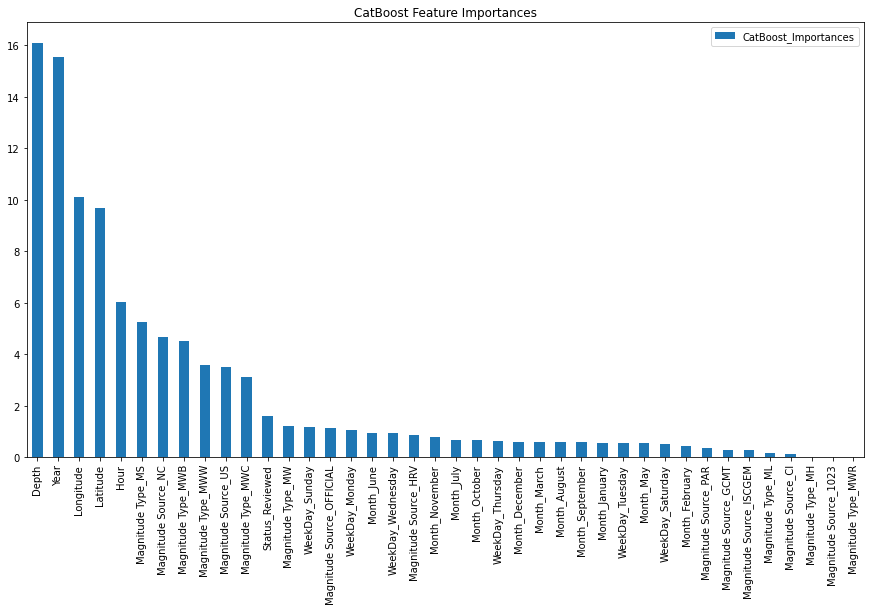

In [89]:
cb_ft_imp.iloc[:40].plot.bar(figsize=(15, 8))
plt.title('CatBoost Feature Importances')